Certifique-se de ter feito o upload do arquivo kaggle.json antes de continuar

In [1]:
!pip install kaggle

In [2]:
!chmod 600 ./kaggle.json

In [3]:
%env KAGGLE_CONFIG_DIR=.
!kaggle competitions download -c santander-product-recommendation

env: KAGGLE_CONFIG_DIR=.


In [4]:
!unzip train_ver2.csv.zip

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("train_ver2.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df['fecha_dato'].value_counts()

2016-05-28    931453
2016-04-28    928274
2016-03-28    925076
2016-02-28    920904
2016-01-28    916269
2015-12-28    912021
2015-11-28    906109
2015-10-28    892251
2015-09-28    865440
2015-08-28    843201
2015-07-28    829817
2015-06-28    632110
2015-05-28    631957
2015-04-28    630367
2015-03-28    629209
2015-02-28    627394
2015-01-28    625457
Name: fecha_dato, dtype: int64

In [8]:
import gc

subset = df[df["fecha_dato"] == "2016-05-28"]
del df
gc.collect()
subset.shape

(931453, 48)

In [9]:
# subset.to_csv("data_05-2016.csv", index=False)

# Ler e analisar os dados

In [10]:
subset.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
12715856,2016-05-28,657640,N,ES,H,68,2006-11-17,0.0,114,1.0,NaN,1,I,S,N,NaN,KAQ,N,1.0,28.0,MADRID,0.0,147347.97,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
12715857,2016-05-28,657788,N,ES,H,42,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KBF,N,1.0,28.0,MADRID,1.0,132559.35,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
12715858,2016-05-28,657795,N,ES,V,44,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KAP,N,1.0,26.0,"RIOJA, LA",1.0,81399.57,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
12715859,2016-05-28,657790,N,ES,V,42,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KBF,N,1.0,48.0,BIZKAIA,1.0,NaN,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0,1.0,1
12715860,2016-05-28,657794,N,ES,H,49,2006-11-18,0.0,114,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,8.0,BARCELONA,1.0,102189.00,01 - TOP,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0


"These products are the columns named: ind_(xyz)_ult1, which are the columns #25 - #48 in the training data. "

- `ind_ahor_fin_ult1`	Saving Account
- `ind_aval_fin_ult1`	Guarantees
- `ind_cco_fin_ult1`	Current Accounts
- `ind_cder_fin_ult1`	Derivada Account
- `ind_cno_fin_ult1`	Payroll Account
- `ind_ctju_fin_ult1`	Junior Account
- `ind_ctma_fin_ult1`	Más particular Account
- `ind_ctop_fin_ult1`	particular Account
- `ind_ctpp_fin_ult1`	particular Plus Account
- `ind_deco_fin_ult1`	Short-term deposits
- `ind_deme_fin_ult1`	Medium-term deposits
- `ind_dela_fin_ult1`	Long-term deposits
- `ind_ecue_fin_ult1`	e-account
- `ind_fond_fin_ult1`	Funds
- `ind_hip_fin_ult1`	Mortgage
- `ind_plan_fin_ult1`	Pensions
- `ind_pres_fin_ult1`	Loans
- `ind_reca_fin_ult1`	Taxes
- `ind_tjcr_fin_ult1`	Credit Card
- `ind_valo_fin_ult1`	Securities
- `ind_viv_fin_ult1`	Home Account
- `ind_nomina_ult1`	Payroll
- `ind_nom_pens_ult1`	Pensions
- `ind_recibo_ult1`	Direct Debit

In [11]:
# products columns
prods = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 
        'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 
        'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 
        'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 
        'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
        'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
        'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
        'ind_nomina_ult1', 'ind_nom_pens_ult1',  'ind_recibo_ult1']

In [12]:
subset["segmento"].value_counts()

02 - PARTICULARES     542596
03 - UNIVERSITARIO    346417
01 - TOP               35415
Name: segmento, dtype: int64

`segmento`  segmentation: 01 - VIP, 02 - Individuals 03 - college graduated

Uma das colunas se chama `segmento` e representa 3 seguimentos de clientes.  
Poderiamos testar um agrupamento com 3 *clusters* e utilizar um criterio de **validaçao externo** baseado nessa coluna. Porem, o enunciado da tarefa menciona para utilizar um criterio de **validaçao interno**.

In [13]:
subset.shape

(931453, 48)

In [14]:
subset["pais_residencia"].value_counts()

ES    927461
FR       312
AR       289
GB       283
DE       280
       ...  
LY         1
GI         1
JM         1
LV         1
IS         1
Name: pais_residencia, Length: 118, dtype: int64

A maior parte dos clientes sao da Espanha.  
Os clientes da França devem ser da comunidade espanhola, pois a Santander nao existe na França. Depois vem principalmente clientes dos paises onde a Santander existe: Argentina, Inglaterra, Alemanha, etc. Porem, eles sao bem menos representados do que na Espanha.  
Como os clientes da **Espanha** correspondem a mais de 99 porcentos dos clientes, vamos desconsiderar os clientes morando fora.  
Assim poderemos depois remover a coluna `pais_residencia` sem medo de perder mais informaçoes e minimizando o risco de gerar ruido.

In [15]:
subset["renta"].describe()

count    7.024350e+05
mean     1.340896e+05
std      2.322205e+05
min      1.202730e+03
25%      6.849379e+04
50%      1.014934e+05
75%      1.555464e+05
max      2.889440e+07
Name: renta, dtype: float64

In [16]:
Q95 = subset.loc[:, "renta"].quantile(0.95)
Q95

310008.39

A distribuiçao de renda é muito *skewed*.  
Porem temos conhecimento que esse banco costuma ter uma oferta mais focada em pessoas da classe media, media-alta.  
O produto o mais "elite" que podemos imaginar seria o cartao black. Mas esse tipo de produto muito exclusivo nao é oferecido via um sistema de recomendaçao automatizado.  
Para deixar a distribuiçao de renda mais normal e remover os outliers, ou seja os clientes muito ricos, vamos alterar a renda dos 5 porcentos das pessoas as mais ricas para um maximo de **3.1e+05**. Na etapa de preprocessamento, consideremos que os clientes ganhando mais que isso fazem parte da mesma categoria.  
Dessa forma, poderemos utilizar essa variavel no algoritmo de agrupamento, ou mesmo no caso contrario, facilitaremos a interpretaçao da relaçao dessa variavel ao resultado do nosso agrupamento. 

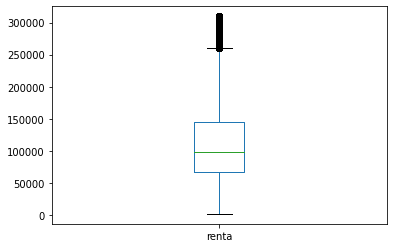

In [17]:
import matplotlib.pyplot as plt

renta_filter_up = (subset.loc[:,"renta"] > Q95)
subset.loc[~renta_filter_up, "renta"].plot.box()
plt.show()

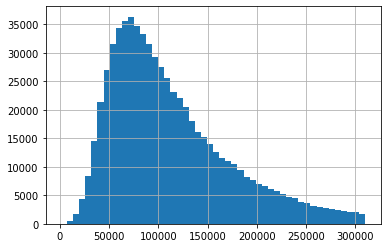

In [18]:
subset.loc[~renta_filter_up, "renta"].hist(bins=50)
plt.show()

A variavel age é continua. Vamos visualizar a distribuiçao dela, para entender como simplifica-la com binarizaçao mais pra frente.

In [19]:
subset["age"].astype(int).describe()

count    931453.000000
mean         40.168298
std          17.185403
min           2.000000
25%          25.000000
50%          38.000000
75%          50.000000
max         164.000000
Name: age, dtype: float64

Uma intuiçao é que depois de 70 anos, a maior preocupaçao é a aposentadoria. Ou seja, as recomendaçoes de produto automatizadas devem ser bem similares para essa classe da populaçao. 

In [20]:
age_filter_up = (subset.loc[:,"age"] > 70)

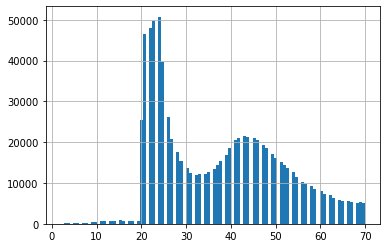

In [21]:
subset.loc[~age_filter_up, "age"].astype(int).hist(bins=100)
plt.show()

In [22]:
import numpy as np

bins = [0, 20, 30, 40, 70, np.inf]

Essa separaçao em classes de idade, parece alinhada com o que costuma ser os interesses bancarios da populaçao.  
Decidi incluir o intervalo 30-40 anos, pois costuma ser um périodo dedicado a uma maior estabilidade profissional, e mais tempo para planejar a compra de um imovel, começar a investir dinheiro, etc. 

In [23]:
subset["conyuemp"].unique()

array([nan, 'N', 'S'], dtype=object)

## Definiçao do objetivo

Vamos realizar um agrupamento nas variaveis de produto, considerando apenas os clientes morando na Espanha, a fim de extrair um seguimento representativo dos comportamentos de consumo dos clientes. Depois disso, interpreteramos as relaçoes entre esse novos seguimentos e outras variaveis do `dataset`.  
As variaveis que vamos considerar na etapa de interpretaçao:

In [24]:
interp_features = ["segmento", "renta", "age", "ind_nuevo", "antiguedad", "conyuemp", "ind_empleado"]

- `segmento`  segmentation: 01 - VIP, 02 - Individuals 03 - college graduated
- `renta`	Gross income of the household
- `age`   Age
- `ind_nuevo`	New customer Index. 1 if the customer registered in the last 6 months
- `antiguedad`	Customer seniority (in months)
- `conyuemp`	Spouse index. 1 if the customer is spouse of an employee
- `ind_empleado`	Employee index: A active, B ex employed, F filial, N not employee, P pasive

# Preprocessamento dos dados

As variaveis que vamos utilizar no agrupamento ja estao no formato adequado. Cada uma representa a quantidade do produto no mes **2016-05**. Porem, vamos processar as outras variaveis para serem interpretadas, a fim de facilitar o entendimento e a visualizaçao.

## Seleçao de variaveis

Selecionamos os atributos de acordo com as nossas consideraçoes anteriores.

In [25]:
sel_features = ["pais_residencia"] + interp_features + prods

In [26]:
transformed_subset = subset[sel_features]
del subset
gc.collect()

transformed_subset.head()

,pais_residencia,segmento,renta,age,ind_nuevo,antiguedad,conyuemp,ind_empleado,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
12715856,ES,02 - PARTICULARES,147347.97,68,0.0,114,NaN,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
12715857,ES,02 - PARTICULARES,132559.35,42,0.0,114,NaN,N,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
12715858,ES,02 - PARTICULARES,81399.57,44,0.0,114,NaN,N,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
12715859,ES,02 - PARTICULARES,NaN,42,0.0,114,NaN,N,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0,1.0,1
12715860,ES,01 - TOP,102189.00,49,0.0,114,NaN,N,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0


Podemos remover os clientes que nao moram na Espanha.

In [27]:
transformed_subset = transformed_subset[transformed_subset["pais_residencia"] == "ES"]
transformed_subset.drop(["pais_residencia"], axis=1, inplace=True)

In [28]:
transformed_subset.columns

Index(['segmento', 'renta', 'age', 'ind_nuevo', 'antiguedad', 'conyuemp',
       'ind_empleado', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')

## Impute dos valores null

In [29]:
transformed_subset.shape

(927461, 31)

In [30]:
transformed_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927461 entries, 12715856 to 13647308
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   segmento           920457 non-null  object 
 1   renta              702391 non-null  float64
 2   age                927461 non-null  object 
 3   ind_nuevo          927461 non-null  float64
 4   antiguedad         927461 non-null  object 
 5   conyuemp           114 non-null     object 
 6   ind_empleado       927461 non-null  object 
 7   ind_ahor_fin_ult1  927461 non-null  int64  
 8   ind_aval_fin_ult1  927461 non-null  int64  
 9   ind_cco_fin_ult1   927461 non-null  int64  
 10  ind_cder_fin_ult1  927461 non-null  int64  
 11  ind_cno_fin_ult1   927461 non-null  int64  
 12  ind_ctju_fin_ult1  927461 non-null  int64  
 13  ind_ctma_fin_ult1  927461 non-null  int64  
 14  ind_ctop_fin_ult1  927461 non-null  int64  
 15  ind_ctpp_fin_ult1  927461 non-null  int64 

Nenhuma das variaveis de produto contem o valor *null*.  
Das variaveis de interpretaçao, so vamos tratar os valores *null* da coluna `conyuemp`.  
De fato, podemos assumir que quando a informaçao nao foi preenchida, entao o cliente nao é cônjuge de um funcionário.

In [31]:
transformed_subset.loc[:, "conyuemp"] = transformed_subset["conyuemp"].fillna('N')
transformed_subset.shape

(927461, 31)

## Simplificaçao dos dados

Alteramos a renda dos 5 porcentos dos clientes os mais ricos, conforme a nossa consideraçao da etapa anterior.

In [32]:
transformed_subset.loc[renta_filter_up, "renta"] = Q95

In [33]:
transformed_subset["binned_age"] = pd.cut(
    transformed_subset["age"], 
    bins=bins,
    labels=["0-20", "20-30", "30-40", "40-70", "70+"])
transformed_subset.drop(["age"], axis=1, inplace=True)

# Agrupamento

## K-means

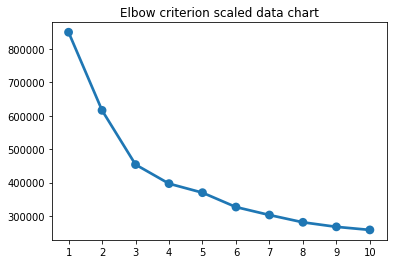

Quantidade de clusters otimal:  4


In [34]:
from sklearn.cluster import KMeans
import seaborn as sns

def find_optimal_k_elbow(df_norm_scaled, chart_name):
    # Create empty sse dictionary
    sse = {}
    
    # Fit KMeans algorithm on k values between 1 and 11
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=333)
        kmeans.fit(df_norm_scaled)
        sse[k] = kmeans.inertia_
    
    # Add the title to the plot
    plt.title('Elbow criterion ' + chart_name + ' data chart')
    
    # Create and display a scatter plot
    xx = list(sse.keys())
    yy = list(sse.values())
    sns.pointplot(x=xx, y=yy)
    plt.show()
    return xx,yy

def optimal_number_of_clusters(x1, x2, y1, y2, wcss):
    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2


def get_optimal_number_of_clusters(df_norm_scaled, chart_name):
    xx, yy = find_optimal_k_elbow(df_norm_scaled, chart_name)
    # calculating the within clusters sum-of-squares for 19 cluster amounts
    x1 = xx[0]
    y1 = yy[0]
    x2 = xx[len(xx)-1]
    y2 = yy[len(yy)-1]
    
    # calculating the optimal number of clusters
    n = optimal_number_of_clusters(x1, x2, y1, y2, yy)
    return n

n = get_optimal_number_of_clusters(transformed_subset[prods], chart_name="scaled")
print("Quantidade de clusters otimal: ", n)

## Avaliaçao com medidas internas

A complexidade dos algoritmos de validaçao interna poder ser muito alta. O nosso dataset tem quase um milhao de registros. Vamos considerar um sample de 200k linhas para podermos proseguir.

### Coeficiente de silhueta

In [92]:
sampled_transformed_subset = transformed_subset.sample(200000)
sampled_transformed_subset.shape

(200000, 31)

In [118]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(4, random_state=42), colors='yellowbrick')

visualizer.fit(sampled_transformed_subset[prods])
visualizer.show()

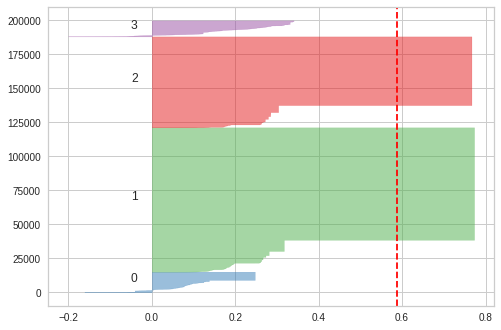

A estrutura de agrupamento parece razoavel.

### Outras medidas

In [ ]:
model = KMeans(4, random_state=42).fit(sampled_transformed_subset[prods])

In [100]:
from sklearn.metrics import davies_bouldin_score, calinski_harabaz_score

dbs = davies_bouldin_score(sampled_transformed_subset[prods], model.labels_)
print("David Bouldin: %0.3f" % dbs)

ch = calinski_harabaz_score(sampled_transformed_subset[prods], model.labels_)
print("Calinski Harabaz: %0.3f" % ch)

David Bouldin: 1.178
Calinski Harabaz: 75036.209


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


In [38]:
del sampled_transformed_subset
gc.collect()

# Interpretaçao dos resultados

In [35]:
model = KMeans(4, random_state=42).fit(transformed_subset[prods])

## Interpretaçao das variaveis

In [36]:
transformed_subset = transformed_subset.assign(cluster = model.labels_)

In [37]:
transformed_subset[["cluster", "renta"]].groupby("cluster").mean().sort_values("renta", ascending=False)

,renta
cluster,
3,142462.379870
2,132474.691221
1,126756.549440
0,114404.596270


In [39]:
transformed_subset[["cluster", "segmento"]].groupby("cluster")["segmento"].value_counts()

cluster  segmento          
0        03 - UNIVERSITARIO    263783
         02 - PARTICULARES     208049
         01 - TOP               13730
1        02 - PARTICULARES     228650
         03 - UNIVERSITARIO     71883
         01 - TOP                5255
2        02 - PARTICULARES      44637
         01 - TOP               10689
         03 - UNIVERSITARIO      9556
3        02 - PARTICULARES      57789
         01 - TOP                5529
         03 - UNIVERSITARIO       907
Name: segmento, dtype: int64

In [40]:
transformed_subset[["cluster", "binned_age"]].groupby("cluster")["binned_age"].value_counts()

cluster  binned_age
0        20-30         245916
         40-70         139166
         30-40          68301
         70+            18466
         0-20           15361
1        40-70         141745
         20-30          72394
         30-40          49375
         70+            28934
         0-20           18685
2        40-70          38569
         30-40          15471
         20-30           8547
         70+             2192
         0-20             114
3        40-70          47013
         70+            10215
         30-40           6061
         20-30            936
Name: binned_age, dtype: int64

- O grupo **3** esta com a maior renda. Percebemos que ele corresponde a um seguimento mais exclusivo, com uma maior proporsao de clientes VIPs e mais velhos.  
- O grupo **0** esta com a renda a mais baixa. Ele corresponde a uma populaçao menos exclusiva, mais universitaria e mais nova.
- Os grupos **1** e **2** nao estao tao diferenciados nestes criterios. O grupo **2** parece um pouco mais exclusivo e mais velho que o grupo **1**. Ele tambem tem uma renda um pouco mais alta.
- O grupo **1** é o mais populado. Pode corresponder aos comportamentos de compra mais *mainstream*.

In [41]:
transformed_subset.loc[:, "antiguedad"] = transformed_subset["antiguedad"].astype(int)

In [42]:
transformed_subset[["cluster", "antiguedad"]].groupby("cluster").mean().sort_values("antiguedad", ascending=False)

,antiguedad
cluster,
3,167.055430
1,84.990078
2,80.051962
0,58.519476


A relaçao da `antiguedad` com os clusters faz sentido de acordo com as interpretaçoes anteriores.  
- Os clientes mais recente (cluster **0**) sao tambem os mais novos, eles tem entre 20 e 30 anos, ou seja, eles tem poucos anos de experiença no mercado de trabalho e uma renda menor por consequencia.
- O cluster **3** corresponde ao clientes os mais antigos, que sao tambem os mais velhos, com mais anos de experiencia e uma renda maior.
- O cluster **2**, mais exclusivo que o **1** tem poucos meses a mais de `antiguedad` que o cluster **1**.

In [44]:
transformed_subset[["cluster", "conyuemp"]].groupby("cluster")["conyuemp"].value_counts()

cluster  conyuemp
0        N           487210
1        N           311133
2        N            64892
         S                1
3        N            64225
Name: conyuemp, dtype: int64

`conyuemp` nao serve aqui. Poderiamos ter desconsiderado ela mais cedo.

In [45]:
transformed_subset[["cluster", "ind_empleado"]].groupby("cluster")["ind_empleado"].value_counts()

cluster  ind_empleado
0        N               487040
         B                   68
         F                   55
         A                   47
1        N               311048
         B                   52
         F                   17
         A                   16
2        N                64735
         A                   78
         B                   56
         F                   23
         S                    1
3        N                64120
         F                   57
         B                   42
         A                    6
Name: ind_empleado, dtype: int64

Obvio que os **not employee** sao os mais presentes em cada grupo.
- No grupo **0** tem mais ex-funcionarios, quem nem no grupo **1**. Esse label é menos raro que os tres outros **active**, **filial**, e **pasive**.
- No grupo **3**, tem mais **filial**. Talvez representa os clientes que trabalham numa filial do banco.
- No grupo **2**, mais exclusivo que o grupo **1**, tem mais **active**. Isso talvez representa os funcionarios ativos.  
Essa variavel `ind_empleado` permite um boa interpretaçao dos comportamentos de compras dos produtos do banco. Pois é intuitivo que cada um desses tipos de empregados tem conhecimentos sobre os produtos e beneficios especificos.  
So nao podemos chegar a nenhuma conclusao aqui por causa da presencia bem mais alta de clientes que nunca foram empregados no banco. Um proximo passo poderia ser de pedir pra area de coleta de dados ir atras de mais informaçoes desses outros tipos de **Employee index** com alguma relaçao especifica de trabalho com o banco.

Agora, vamos ver quais sao os produtos os mais comprados por cada um dos seguimentos do nosso agrupamento.

In [64]:
agg_df = transformed_subset[["cluster"] + prods].groupby("cluster").sum()
agg_df

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,17,3,487210,131,655,2,4220,0,13144,107,375,14588,31642,5699,821,1734,672,13497,8519,8168,785,442.0,535.0,48616
1,29,0,0,49,9654,7577,2888,26428,6580,9,37,4885,13507,1493,436,1422,1030,6883,2218,1535,644,129.0,259.0,2059
2,7,11,7755,56,62299,1,955,9078,10324,60,174,5749,25586,3626,2954,2816,204,20260,20368,6425,603,47448.0,51678.0,53442
3,25,1,63768,79,384,0,15,64225,3103,138,421,5868,4826,3742,307,1343,81,4775,3585,5036,923,266.0,338.0,8651


In [66]:
agg_df.max(axis=1)

cluster
0    487210.0
1     26428.0
2     62299.0
3     64225.0
dtype: float64

- cluster **0**: `ind_cco_fin_ult1` - **Current Accounts**
- cluster **1**: `ind_ctop_fin_ult1` - **particular Account**
- cluster **2**: `ind_cno_fin_ult1` - **Payroll Account**
- cluster **3**: `ind_ctop_fin_ult1` - **particular Account**

- seguimento **0** é representado por pessoas mais novas e clientes recentes. O primeiro produto bancario para ser contratado costuma ser uma conta corrente.
- **particular account** pode ser uma poupança mas tambem pode representar outros tipos de contas. Neste caso, o dominio desta variavel nao é muito explicito e nao permite interpretar alem.
- O seguimento **2** é mais exclusivo, mais velho que o seguimento **1** e parecia ser composto de mais funcionarios ativos. **Payroll Account** costuma ser contratado para remunerar os funcionarios de um negocio. Talvez o nosso agrupamento colocou juntos os clientes donos de empresa. Isso ajudaria a diferenciar melhor esse seguimento **2** dos outros.

## Aprendizado supervisionado

In [43]:
!pip install dtreeviz

     |████████████████████████████████| 61 kB 506 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.1-py3-none-any.whl size=67694 sha256=9546197f5cd613b29f3f6fa5bc78bef8fb1dec854409191feb9cca15abb6120c
  Stored in directory: /root/.cache/pip/wheels/f4/e0/4c/26144f03fd05b7c3d82e5cf2679c2d6bd9d9b730548264674d
Successfully built dtreeviz


In [46]:
from dtreeviz.trees import dtreeviz
from dtreeviz.classifiers import clfviz

In [50]:
y = transformed_subset["cluster"]
X = transformed_subset.drop(["cluster", "conyuemp"], axis=1)

### Encoding das variaveis de categoria

In [52]:
to_encode = ["ind_empleado", "segmento", "binned_age"]
# drop_first=False for interpretation
X_encoded = pd.get_dummies(data=X, columns=to_encode, drop_first=False)
X_encoded.head()

,renta,ind_nuevo,antiguedad,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,ind_empleado_A,ind_empleado_B,ind_empleado_F,ind_empleado_N,ind_empleado_S,segmento_01 - TOP,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO,binned_age_0-20,binned_age_20-30,binned_age_30-40,binned_age_40-70,binned_age_70+
12715856,147347.97,0.0,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
12715857,132559.35,0.0,114,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
12715858,81399.57,0.0,114,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
12715859,NaN,0.0,114,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0,1.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
12715860,102189.00,0.0,114,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


### Impute dos valores null

In [55]:
# listwise deletion
X_encoded.dropna(how="any", inplace=True)
X_encoded.shape

(702391, 40)

In [59]:
y = y.reindex_like(X_encoded)

### Modelagem e interpretaçao

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=22, max_leaf_nodes=10)
clf.fit(X_encoded, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


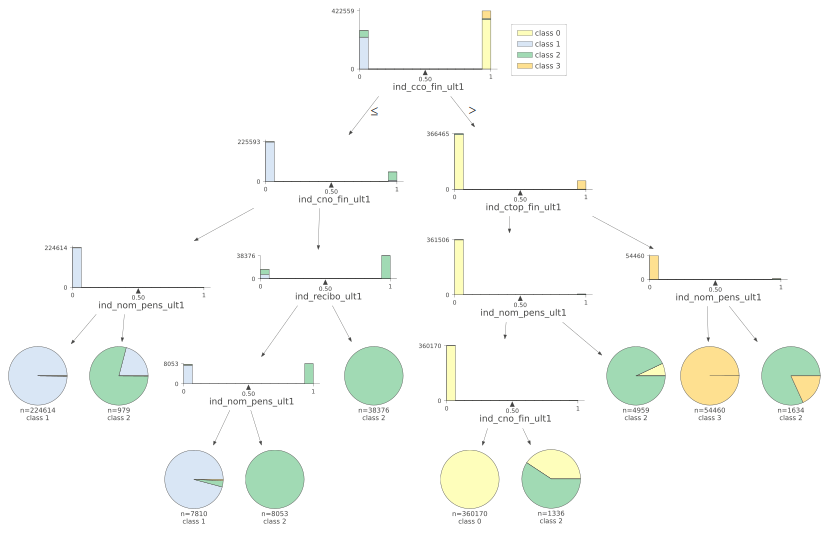

In [61]:
viz = dtreeviz(
    clf,
    X_encoded,
    y,
    feature_names=X_encoded.columns
)
viz

Esse fluxo permite identificar mais facilmente o padrao de compra de cada um desses seguimentos.

Por exemplo, 
- quem so contratou uma conta corrente sera classificado como **0**.
- quem contratou uma conta corrente e um *particular account* sera classificado como **3**.
- quem nao contratou nenhum produto sera classificado **1**.
- podemos perceber tambem que o grupo **2** tem padroes de compra mais diversos. Ele aparece em mais folhas. Esse grupo parece ter mais conhecimentos sobre os produtos do banco. Ficou coherente com as interpretaçoes anteriores. Pois os funcionarios ativos do banco e os donos de empresa costumam ter mais interaçoes com o banco, e receber mais anuncios, informaçoes de produtos.